In [5]:
import pandas
import matplotlib.pyplot as plt

In [23]:
data = pandas.read_csv('/home/vpalladi/FW/MP7/cactusupgrades/projects/hgc/sim/latency.csv')
data.head()

,fileName,sAcquired,beginComputing,endComputing,beginSend,endSend
0,outR_0.mp7,10,60,66,68,93
1,outR_100.mp7,10,90,96,98,123
2,outR_101.mp7,10,76,82,84,109
3,outR_102.mp7,10,98,104,106,131
4,outR_103.mp7,10,60,66,68,93


In [24]:
def plotLatency(val, fileName) :
    #val = (data.endComputing-data.beginComputing)

    n, bins, patches = plt.hist( ( val * 1/320 ), 40)
    mean = val.mean()
    sigma = val.std()

    plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=%.4f \mu s$' % (mean*1/320) )
    plt.xlabel('Latency ($\mu$s)')
    #plt.axis([60, 160, 0, 1])
    plt.savefig(fileName, dpi=300)

    plt.show()

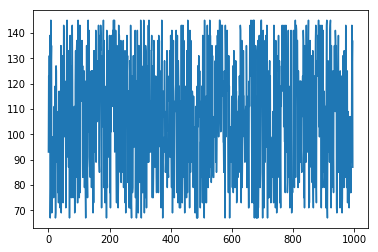

In [25]:
plt.plot(data.endSend)
plt.show()


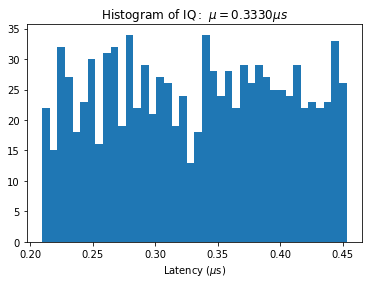

In [33]:

val = data.endSend

plotLatency(val, '/home/vpalladi/Desktop/CMS/PICS/latency/latency.png')


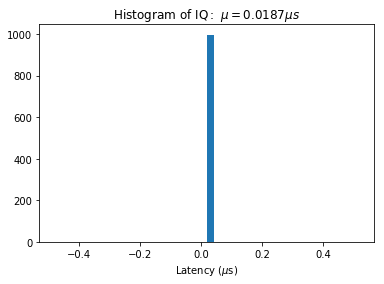

In [38]:
val = (data.endComputing-data.beginComputing)
plotLatency( val, '/home/vpalladi/Desktop/CMS/PICS/latency/latencyComputing.png' ) 

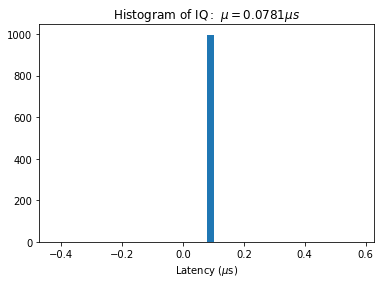

In [37]:
val = (data.endSend-data.beginSend)
plotLatency( val, '/home/vpalladi/Desktop/CMS/PICS/latency/latencySend.png' )

In [29]:
import sys
sys.path.append('/home/vpalladi/SW/HGC/sim/HgcTpgSim/python/naming')

from modules.mp7 import *

in_data = []

for i,f in enumerate(data.fileName) :
    if (i)%100 == 0 and i != 0:
        print '>> ',i,'events processed'
    board = MP7()
    board.load_file('data/'+f)
    in_data.append( len(board.data_32b[0]) )
        

>>  100 events processed
>>  200 events processed
>>  300 events processed
>>  400 events processed
>>  500 events processed
>>  600 events processed
>>  700 events processed
>>  800 events processed
>>  900 events processed


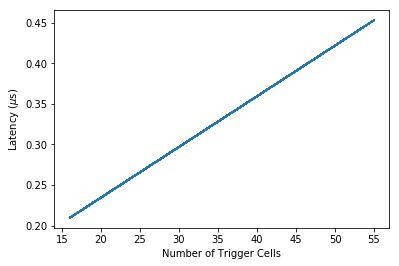

In [42]:

plt.plot(in_data, data.endSend*1/320)

plt.xlabel('Number of Trigger Cells')
plt.ylabel('Latency ($\mu$s)')

plt.savefig('/home/vpalladi/Desktop/CMS/PICS/latency/latencyVsDataDepth.png', dpi=300)
plt.show()
